<a href="https://colab.research.google.com/github/shashank297/Global-Emissions-Data-Analysis/blob/main/Global_Emissions_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset from this [link](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

In [67]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### Columns category types
- **region**:- `categorical`
- **country**:- `categorical`
- **emissions**:- `Numarical`
- **type**:- `categorical`
- **segment**:- `categorical`
- **reason**:- `categorical`
- **baseyear**:- `time_categorical`
- **notes**:- `categorical`

In [68]:
df=pd.read_csv('/drive/My Drive/Data set masai/Methane_final.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


#### Find out the dataset dimensions

In [69]:
df.shape

(1548, 8)

#### Find out statistical summary of the Dataset

**Assumption based on below cell**
- because of outliers and diffrence between Min and max values the mean is not the best representation

In [70]:
df.describe()

,emissions
count,1548.000000
mean,643.255972
std,5566.238201
min,0.000459
25%,2.659361
50%,24.064669
75%,128.419594
max,141953.765625


In [71]:
df[['emissions']].median()

emissions    24.064669
dtype: float64

#### Check for the null values in Dataset

In [72]:
df.isnull().sum()

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64

#### Check for the noise value of the dataset

In [73]:
for i in df.columns:
  print(i,df[i].unique())

region ['Africa' 'Asia Pacific' 'Central and South America' 'Europe'
 'Middle East' 'North America' 'Other' 'Russia & Caspian' 'World']
country ['Algeria' 'Angola' 'Benin' 'Botswana' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire"
 'Democratic Republic of Congo' 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya'
 'Liberia' 'Libya' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Senegal' 'Seychelles' 'Sierra Leone' 'Somalia' 'South Africa'
 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Tunisia' 'Australia'
 'Bangladesh' 'Brunei' 'China' 'India' 'Indonesia' 'Japan' 'Korea'
 'Malaysia' 'Mongolia' 'New Zealand' 'Other countries in Southeast Asia'
 'Pakistan' 'Philippines' 'Thailand' 'Vietnam' 'Argentina' 'Bolivia'
 'Brazil' 'Colombia' 'Cuba' 'Ecuador' 'Guyana' 'Paraguay' 'Peru'
 'Trinidad and Tobago' 'Uruguay' 'Venezuela' 'Denmark' 'Estonia'
 'European Union' 'France' 'Germany' 'Israel' 'Italy' 'Netherlands'
 'N

In [74]:
df[df.region=='World'].count()

region       22
country      22
emissions    22
type         22
segment      22
reason       22
baseYear     22
notes        22
dtype: int64

In [75]:
df[df.region=='Other'].count()

region       21
country      21
emissions    21
type         21
segment      21
reason       21
baseYear     21
notes        21
dtype: int64

#### Handle the null values in the Dataset

### As checked there is no Null values

#### Handle the Noise Values in Dataset

- In the `region` column there is a catagory `World` and `Other` which is refering to the same info. So, replacing `World` with `Other`.
- In the `baseyear` column `2019-2021` replacing with `2021`

In [76]:
df.region=df.region.str.replace('World','Other')
df.baseYear=df.baseYear.str.replace('2019-2021','2021')

In [77]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

**As check there is outliares but after ckecking the values are correct**
- because of each country and region as a diffirant productions and and manufacuring capabilities which is directly related to emissions.
- So, dicided not to remove outliare.

In [78]:
df[df['emissions']>15000]

,region,country,emissions,type,segment,reason,baseYear,notes
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1406,North America,United States,16769.630859,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1526,Other,World,141953.765625,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1540,Other,World,25941.500000,Energy,Onshore oil,Vented,2022,Not available
1544,Other,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,Other,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1547,Other,World,70758.710938,Waste,Total,All,2021,Average based on United Nations Framework Conv...


In [79]:
Q1 = df['emissions'].quantile(0.25)
Q3 = df['emissions'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df[(df['emissions'] < Q1 - threshold*IQR) | (df['emissions'] > Q3 + threshold*IQR)]

,region,country,emissions,type,segment,reason,baseYear,notes
5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available
6,Africa,Algeria,469.786987,Energy,Onshore oil,Flared,2022,Not available
8,Africa,Algeria,1154.119995,Energy,Onshore oil,Vented,2022,Not available
12,Africa,Algeria,2669.194580,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
14,Africa,Algeria,510.965607,Waste,Total,All,2021,Average based on United Nations Framework Conv...
...,...,...,...,...,...,...,...,...
1543,Other,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,Other,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,Other,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,Other,World,9737.874023,Other,Total,All,2021,Average based on United Nations Framework Conv...


<Axes: >

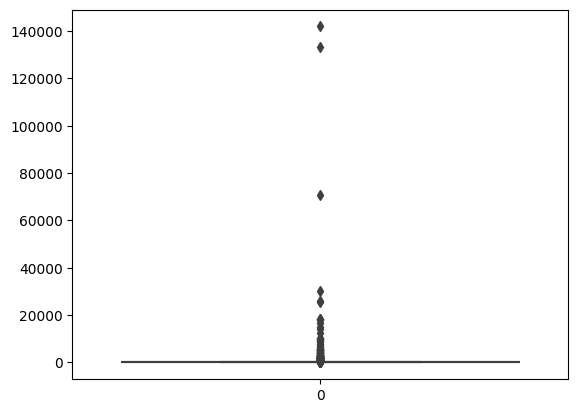

In [80]:
sns.boxplot(df.emissions)

**Univariate Analysis**
- `region`:-Africa has the higher count `406` with the with a `26.2` Percentage.


In [81]:
df.region.value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
Other                         43
Name: region, dtype: int64

<Axes: >

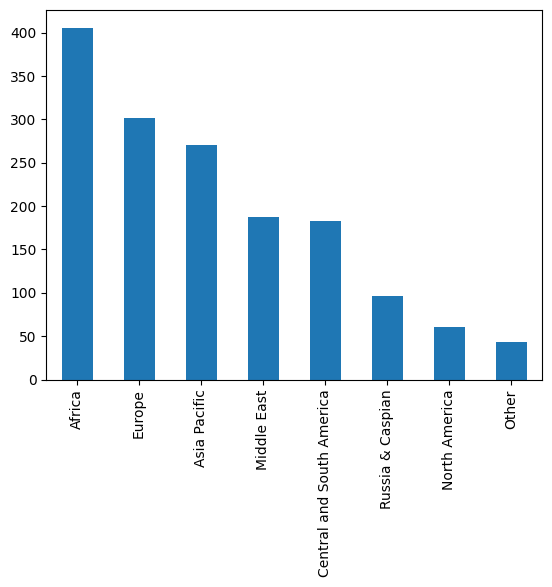

In [82]:
df.region.value_counts().plot(kind='bar')

<Axes: ylabel='region'>

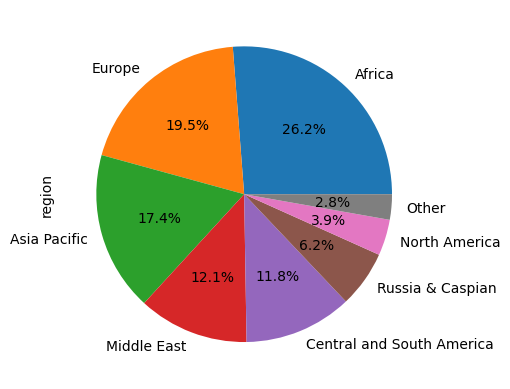

In [83]:
df.region.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [84]:
df.country.value_counts()

World                       22
Iran                        22
European Union              22
Russia                      22
Kazakhstan                  22
                            ..
Central African Republic     3
Liberia                      3
Sierra Leone                 3
Seychelles                   3
Gambia                       3
Name: country, Length: 105, dtype: int64

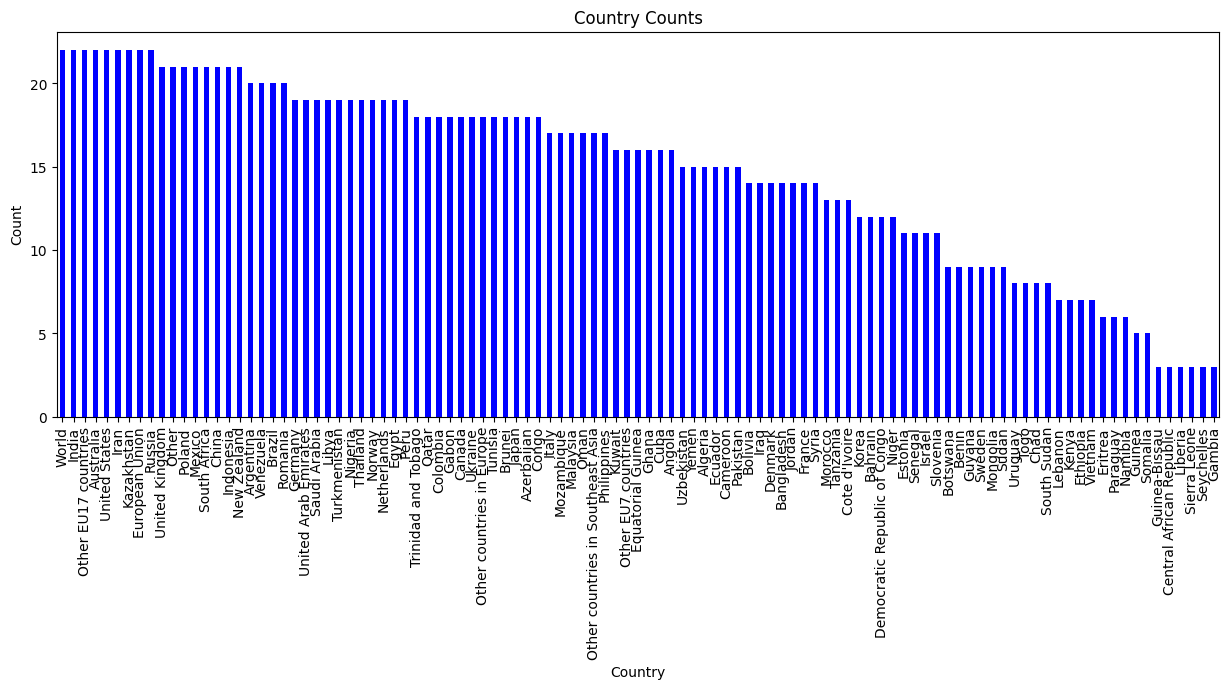

In [87]:
# Set plot size
plt.figure(figsize=(15, 5))

# Generate the plot
df.country.value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')

# Add a title and axis labels
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')

# Show the plot
plt.show()

In [88]:
df.type.value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64

<Axes: >

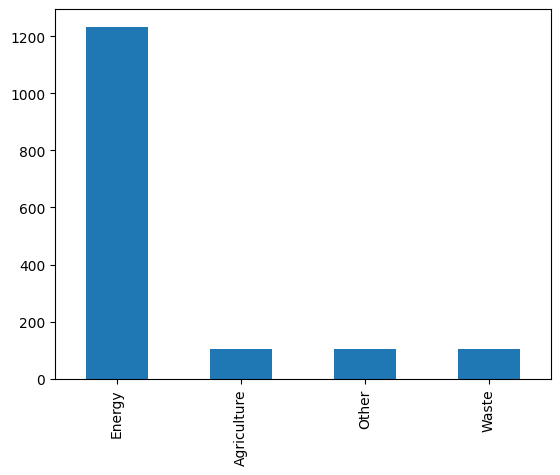

In [89]:
df.type.value_counts().plot(kind='bar')

<Axes: ylabel='type'>

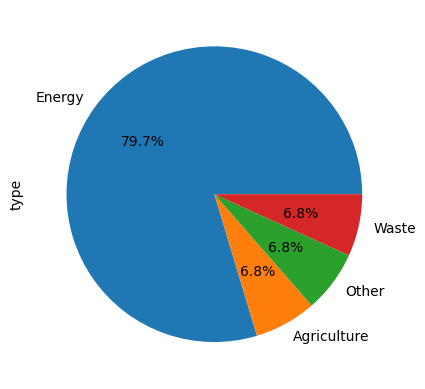

In [90]:
df.type.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [91]:
df.segment.value_counts()

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64

<Axes: >

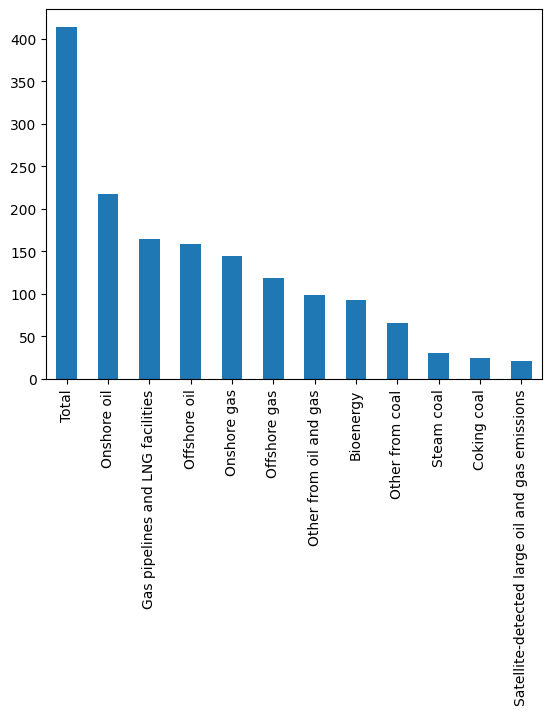

In [92]:
df.segment.value_counts().plot(kind='bar')

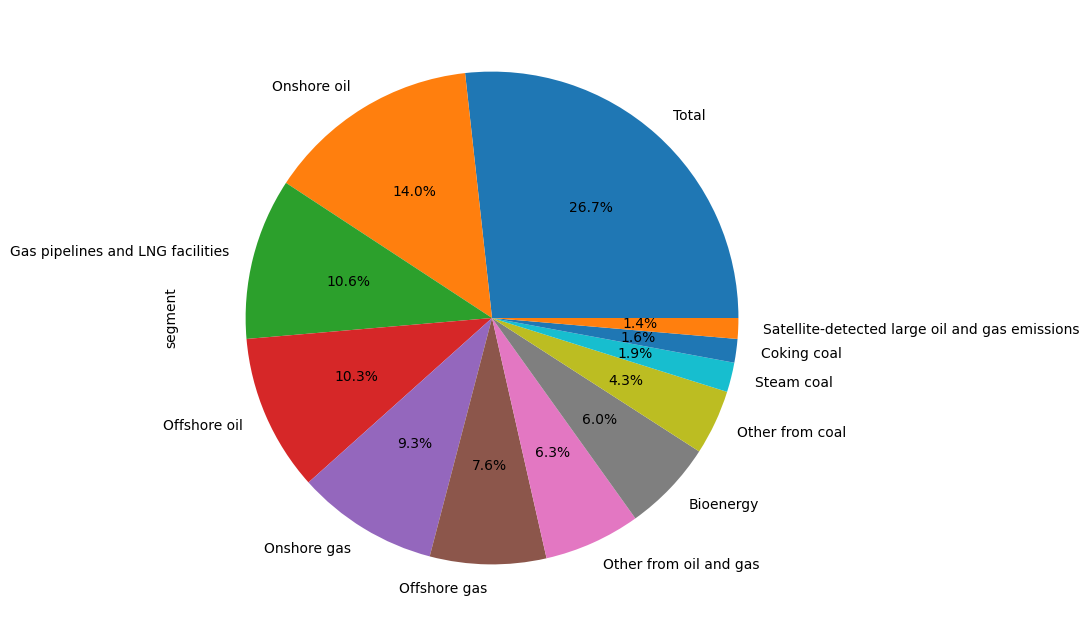

In [98]:
plt.figure(figsize=(10, 8))

df.segment.value_counts().plot(kind='pie',autopct='%0.1f%%')

plt.show()

In [99]:
df.reason.value_counts()

All         746
Fugitive    342
Vented      342
Flared      118
Name: reason, dtype: int64

<Axes: >

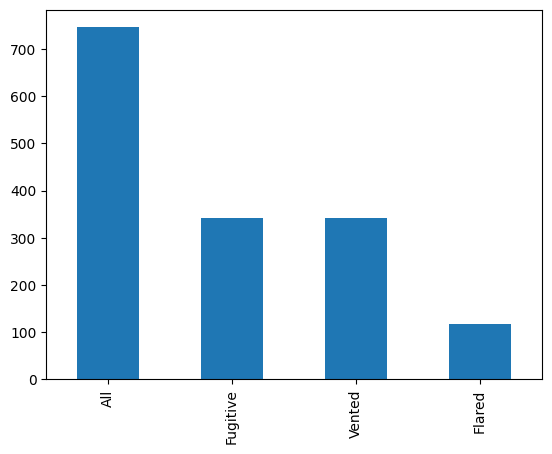

In [100]:
df.reason.value_counts().plot(kind='bar')

<Axes: ylabel='reason'>

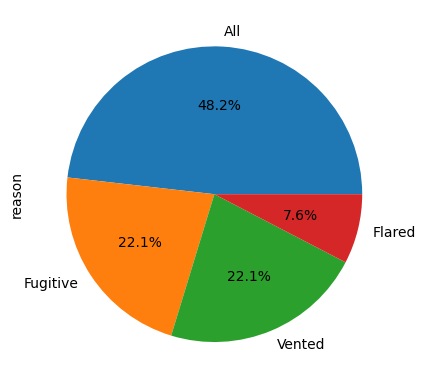

In [101]:
df.reason.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [102]:
df.baseYear.value_counts()

2022    1233
2021     315
Name: baseYear, dtype: int64

<Axes: >

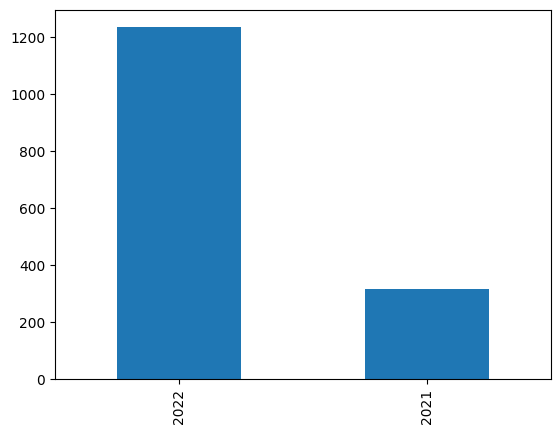

In [103]:
df.baseYear.value_counts().plot(kind='bar')

<Axes: ylabel='baseYear'>

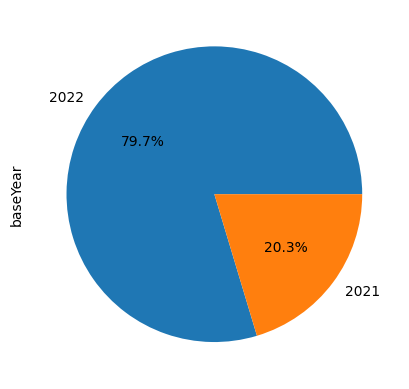

In [104]:
df.baseYear.value_counts().plot(kind='pie',autopct='%0.1f%%')

## Add the Cells below and Find out underlying Trends from the dataset 
- Make sure to write your hypothesis and test based on it
- if hypothesis is not correct, explain what could be the reason

# Write a summery of the Analysis in bullet points in this section **(Mandatory)**